# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Image Classification and Segmentation
---

### <a style='color:red'> Due Date: 15.5.2023 </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* **DON'T** submit the CIFAR-10 dataset in your submission, we have a local copy of it.
* **DON'T** submit the trained networks, but make sure to document every result you get.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).
* **Do** write the code in the notebook itself.

### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

In [1]:
# run this cell to make sure you are good to go
import numpy as np
import seaborn as sns
import scipy
import sklearn
from torchvision import datasets
import cv2
import matplotlib.pyplot as plt
import time
import os
from PIL import Image

# pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms



### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Classifier
---
In this part we are going to examine the performance of a classical classifier over images from the **Canadian Institute For Advanced Research (CIFAR-10)**  Dataset. 

* The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
  * There is also CIFAR-100, with 100 classes.
* The classes are completely mutually exclusive. For example, there is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.
* <a href="https://www.cs.toronto.edu/~kriz/cifar.html">Official Site</a>


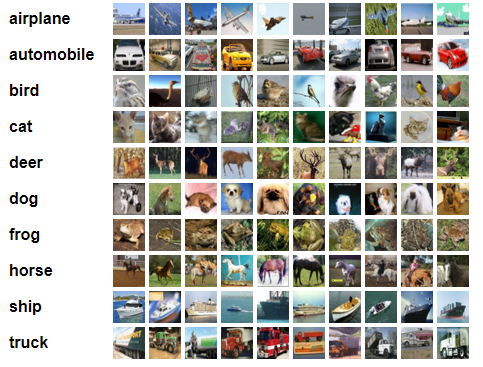


1. Load the CIFAR-10 training and test set with PyTorch (<a href="https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html#torchvision.datasets.CIFAR10">read more here</a>). Display 5 images from the training set with their labels as title.

In [3]:
test_set = datasets.CIFAR10(root = "C:\\Users\\nirsa\\Google Drive\\Computer Vision\\HW\\HW2\\ee046746_hw2_classification\\data",download= False,train=False)
train_set = datasets.CIFAR10(root = "C:\\Users\\nirsa\\Google Drive\\Computer Vision\\HW\\HW2\\ee046746_hw2_classification\\data",download= False,train=True)


transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = datasets.CIFAR10(
    root="C:\\Users\\nirsa\\Google Drive\\Computer Vision\\HW\\HW2\\ee046746_hw2_classification\\data", train=True, download=False, transform=transform)

testset = datasets.CIFAR10(
    root="C:\\Users\\nirsa\\Google Drive\\Computer Vision\\HW\\HW2\\ee046746_hw2_classification\\data", train=False, download=False,
    transform=transform)




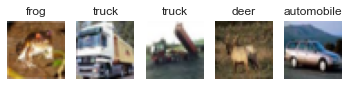

In [4]:
NOE = 5
images = train_set.data[0:NOE]
labels = train_set.targets[0:NOE]
classes = train_set.classes
f, axarr = plt.subplots(1,images.shape[0])
for i in range(images.shape[0]):
    axarr[i].imshow(images[i])
    axarr[i].set_title(classes[labels[i]])
    axarr[i].axis('off')

2. Build a K-Nearest Neighbors (K-NN) classifier (hint: `sklearn.neighbors.KNeighborsClassifier`), with `n_neighbors=10`, to classify CIFAR-10: Load 10,000 samples from the training set and train the model. 

  **Note**: The model's input dimension should be : `(n_samples, n_features)`, Thus you need to convert each color channel to row representation and then concatenate the 3 color channels.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_and_test(train_set,test_set,NOE,NOT,n_neighbors):
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
    # training the model
    X = train_set.data[0:NOE]
    X = X.reshape(X.shape[0],32*32*3)
    y = train_set.targets[0:X.shape[0]]
    neigh.fit(X, y)
    XT = test_set.data[0:NOT]
    XT = XT.reshape(XT.shape[0],32*32*3)
    yT = test_set.targets[0:XT.shape[0]]
    prediction = neigh.predict(XT)
    return(neigh,accuracy_score(yT,prediction),prediction)





3. Load 1,000 samples from CIFAR-10 test set and check the performance of the K-NN classifier over these samples. What is the accuracy obtained? View the results using a <a href="https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62">confusion matrix </a>

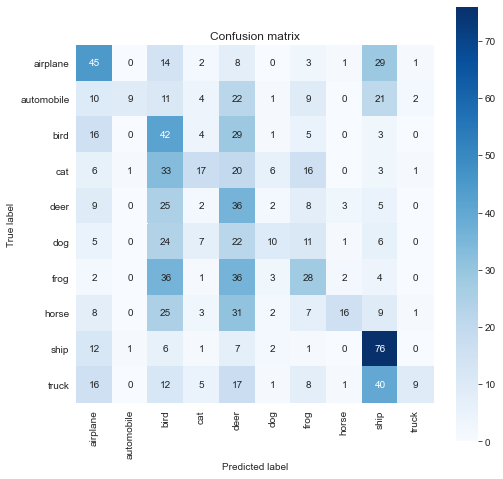

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
neigh,prediction_accuracy,prediction = train_and_test(train_set,test_set,10000,1000,10)
confusion_matrix = confusion_matrix(test_set.targets[0:1000],prediction)
# disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = neigh.classes_)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', square=True, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

4. Compare the model's accuracy for different number of neighbors ($1 \leq K \leq 30$ ). Display the results in a graph of accuracy as function of $K$.

In [7]:
prediction_accuracy = np.zeros((30,1))
K = [i for i in range(1,31)]
for i, k in enumerate(K):
    neigh,prediction_accuracy[i],prediction = train_and_test(train_set,test_set,10000,1000,k)

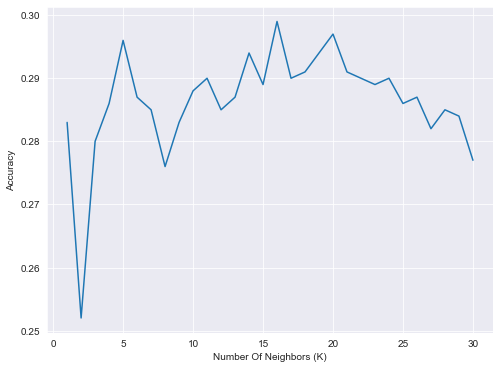

In [9]:
plt.figure(figsize=(8,6))
plt.plot(K, prediction_accuracy)
plt.xlabel('Number Of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

In [44]:
print(np.max(prediction_accuracy))
print(K[np.argmax(prediction_accuracy)])

0.299
16


#### Part 2 - Design and Build a CNN Classifier
---
In this part you are going to design a deep convolutional neural network to classify CIFAR-10 dataset. 

1. Use the CNN from tutorials 3-4 (`SvhnCnn()`) and train it on the CIFAR-10 dataset (**keep the architecture the same**) for the same number of **epochs** with the same learning rate (try to keep the batch size the same, but if you get memory errors, you can reduce it). What is the accuracy on the test set? What classes are most confusing for this model?
    * Your test accuracy from this section will be your **baseline** accuracy for sections 2-3.

In [10]:
class SvhnCNN(nn.Module):
    
    def __init__(self):
        super(SvhnCNN, self).__init__()

        self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout2d(p=0.5),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(8192, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

In [12]:
dummy_input = torch.zeros([1, 3, 32, 32])
dummy_model = SvhnCNN()
dummy_output = dummy_model.conv_layer(dummy_input)
print(dummy_output.shape)
dummy_output = dummy_output.view(dummy_output.size(0), -1)
print(dummy_output.shape)
# calculating the number of trainable weights
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num of trainable weights: ", num_trainable_params)

torch.Size([1, 128, 8, 8])
torch.Size([1, 8192])
num of trainable weights:  4482058


In [13]:
# time to train our model
# hyper‑parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20
# dataloaders ‑ creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
testset, batch_size=batch_size, shuffle=False, num_workers=2)
# device ‑ cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using {device}')
# loss criterion
criterion = nn.CrossEntropyLoss()
# build our model and send it to the device
model = SvhnCNN().to(device) # no need for parameters as we alredy defined them in the class
# optimizer ‑ SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Using cuda:0


In [14]:
def calculate_accuracy(model, dataloader, device):
    model.eval() # put in evaluation mode
    total_correct = 0
    total_images = 0
    confusion_matrix = np.zeros([10,10], int)
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_images += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            for i, l in enumerate(labels):
                confusion_matrix[l.item(), predicted[i].item()] += 1

    model_accuracy = total_correct / total_images * 100
    return model_accuracy, confusion_matrix

In [15]:
# training loop
for epoch in range(1, epochs + 1):
    model.train() # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs) # forward pass
        loss = criterion(outputs, labels) # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad() # zero the parameter gradients
        loss.backward() # backpropagation
        optimizer.step() # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)
    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)
    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)

    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, 'D:\datasets\checkpoints\STATE.pth')
print('==> Finished Training ...')

Epoch: 1 | Loss: 1.6869 | Training accuracy: 48.758% | Test accuracy: 48.620% | Epoch Time: 29.02 secs
Epoch: 2 | Loss: 1.3609 | Training accuracy: 57.546% | Test accuracy: 56.680% | Epoch Time: 25.97 secs
Epoch: 3 | Loss: 1.2131 | Training accuracy: 61.900% | Test accuracy: 60.490% | Epoch Time: 24.84 secs
Epoch: 4 | Loss: 1.1101 | Training accuracy: 64.896% | Test accuracy: 63.480% | Epoch Time: 24.84 secs
Epoch: 5 | Loss: 1.0296 | Training accuracy: 68.952% | Test accuracy: 66.820% | Epoch Time: 25.41 secs
Epoch: 6 | Loss: 0.9571 | Training accuracy: 71.060% | Test accuracy: 67.930% | Epoch Time: 25.49 secs
Epoch: 7 | Loss: 0.8967 | Training accuracy: 72.268% | Test accuracy: 68.790% | Epoch Time: 26.22 secs
Epoch: 8 | Loss: 0.8481 | Training accuracy: 75.434% | Test accuracy: 71.320% | Epoch Time: 25.72 secs
Epoch: 9 | Loss: 0.8023 | Training accuracy: 76.594% | Test accuracy: 72.010% | Epoch Time: 25.76 secs
Epoch: 10 | Loss: 0.7574 | Training accuracy: 78.230% | Test accuracy: 72

test accuracy: 77.100%


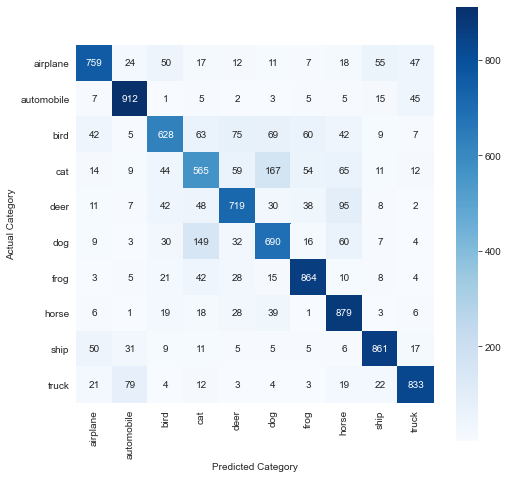

In [16]:
model = SvhnCNN().to(device)
state = torch.load('D:\datasets\checkpoints\STATE.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', square=True, xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

2. Design your own Convolutional Neural Network (CNN) to classify CIFAR-10. You can modify the network from section 1,but **you must get a better result than your baseline accuracy from section 1**.
    * You **need** to use one of the following in your CNN - Residual block, activation function PReLU, activation function Leaky ReLU, Group Normalization, Exponential moving average (EMA).
      Explain the technique you have chosen.
    * Describe the chosen architecture, how many layers? What activations did you choose? What are the filter sizes? Did you use fully-connected layers (if you did, explain their sizes)?
    * What is the input dimension? What is the output dimension?
    * Calculate the number of parameters (weights) in the network.

  **Note:**
    * The new network should perform better over the same task (i.e. using the same data with the same hyper-parameters. Change only the network architecture).
    * Students who reach the highest accuracy over the test set will receive **5 bonus points** for this exercise.

3. Train the classifier (preferably on a **GPU - use Colab for this part** if you don't have a GPU).
    * Describe the hyper-parameters of the model (batch size, epochs, learning rate....). How did you tune your model? Did you use a validation set to tune the model? (<a href="https://gist.github.com/MattKleinsmith/5226a94bad5dd12ed0b871aed98cb123">Separating to train/validation/test in PyTorch</a>)
    * What is the final accuracy on the test set?

##### our cifar-10 classefiar

In [61]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.out_channels = out_channels
        self.conv_layer = nn.Sequential(
              nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
              nn.BatchNorm2d(out_channels),
              nn.LeakyReLU(negative_slope=0.1),
              nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False),
              nn.BatchNorm2d(out_channels),
              nn.LeakyReLU(negative_slope=0.1),
        )

        self.skip_connection = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=1, stride=1, padding=0, dilation=1),
            nn.BatchNorm2d(out_channels)
        )


    def forward(self, x):
        out = self.conv_layer(x)
        out += self.skip_connection(x)
        return out



class Cifar10CNN(nn.Module):

    def __init__(self):
        super(Cifar10CNN, self).__init__()

        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.1),

            ResidualBlock(in_channels=32, out_channels=64),

            nn.LeakyReLU(negative_slope=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.1),

            ResidualBlock(in_channels=128, out_channels=256),

            nn.LeakyReLU(negative_slope=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.5),

            ResidualBlock(in_channels=256, out_channels=512),

            nn.LeakyReLU(negative_slope=0.1),
            nn.MaxPool2d(kernel_size=2, stride=2),

            ResidualBlock(in_channels=512, out_channels=256),

            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=1, padding=1,stride=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.1)
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4608, 64),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Linear(64, 10)
        )


    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x


In [64]:
dummy_input = torch.zeros([1, 3, 32, 32])
dummy_model = Cifar10CNN()
dummy_output = dummy_model.conv_layer(dummy_input)
print(dummy_output.shape)
dummy_output = dummy_output.view(dummy_output.size(0), -1)
print(dummy_output.shape)
# calculating the number of trainable weights
num_trainable_params = sum([p.numel() for p in dummy_model.parameters() if p.requires_grad])
print("num trainable weights: ", num_trainable_params)

torch.Size([1, 128, 6, 6])
torch.Size([1, 4608])
num trainable weights:  6956874


In [39]:
# training our model
# hyper‑parameters
batch_size = 128
learning_rate = 1e-4
epochs = 20
# dataloaders ‑ creating batches and shuffling the data
trainloader = torch.utils.data.DataLoader(
trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
testset, batch_size=batch_size, shuffle=False, num_workers=2)
# device ‑ cpu or gpu?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Using {device}')
# loss criterion
criterion = nn.CrossEntropyLoss()
# build our model and send it to the device
model = Cifar10CNN().to(device) # no need for parameters as we alredy defined them in the class
# optimizer ‑ SGD, Adam, RMSProp...
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Using cuda:0


In [40]:
for epoch in range(1, epochs + 1):
    model.train() # put in training mode
    running_loss = 0.0
    epoch_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # send them to device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs) # forward pass
        loss = criterion(outputs, labels) # calculate the loss
        # always the same 3 steps
        optimizer.zero_grad() # zero the parameter gradients
        loss.backward() # backpropagation
        optimizer.step() # update parameters

        # print statistics
        running_loss += loss.data.item()

    # Normalizing the loss by the total number of train batches
    running_loss /= len(trainloader)
    # Calculate training/test set accuracy of the existing model
    train_accuracy, _ = calculate_accuracy(model, trainloader, device)
    test_accuracy, _ = calculate_accuracy(model, testloader, device)
    log = "Epoch: {} | Loss: {:.4f} | Training accuracy: {:.3f}% | Test accuracy: {:.3f}% | ".format(epoch, running_loss, train_accuracy, test_accuracy)
    epoch_time = time.time() - epoch_time
    log += "Epoch Time: {:.2f} secs".format(epoch_time)
    print(log)

    # save model
    if epoch % 20 == 0:
        print('==> Saving model ...')
        state = {
            'net': model.state_dict(),
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoints'):
            os.mkdir('checkpoints')
        torch.save(state, 'D:\datasets\checkpoints\Our_Cifar10_STATE.pth')
print('==> Finished Training ...')

Epoch: 1 | Loss: 1.3211 | Training accuracy: 62.196% | Test accuracy: 60.430% | Epoch Time: 65.31 secs
Epoch: 2 | Loss: 0.8604 | Training accuracy: 68.972% | Test accuracy: 66.760% | Epoch Time: 65.50 secs
Epoch: 3 | Loss: 0.6896 | Training accuracy: 69.140% | Test accuracy: 66.010% | Epoch Time: 66.97 secs
Epoch: 4 | Loss: 0.5826 | Training accuracy: 79.836% | Test accuracy: 75.900% | Epoch Time: 66.15 secs
Epoch: 5 | Loss: 0.5043 | Training accuracy: 79.388% | Test accuracy: 74.450% | Epoch Time: 65.18 secs
Epoch: 6 | Loss: 0.4372 | Training accuracy: 84.266% | Test accuracy: 77.960% | Epoch Time: 67.90 secs
Epoch: 7 | Loss: 0.3826 | Training accuracy: 88.134% | Test accuracy: 80.030% | Epoch Time: 68.85 secs
Epoch: 8 | Loss: 0.3365 | Training accuracy: 88.950% | Test accuracy: 80.670% | Epoch Time: 68.95 secs
Epoch: 9 | Loss: 0.2965 | Training accuracy: 89.026% | Test accuracy: 79.100% | Epoch Time: 68.78 secs
Epoch: 10 | Loss: 0.2539 | Training accuracy: 93.556% | Test accuracy: 82

test accuracy: 83.510%


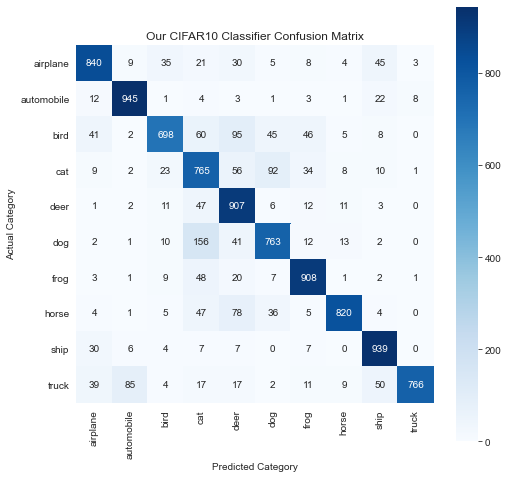

In [41]:
model = Cifar10CNN().to(device)
state = torch.load('D:\datasets\checkpoints\Our_Cifar10_STATE.pth', map_location=device)
model.load_state_dict(state['net'])

test_accuracy, confusion_matrix = calculate_accuracy(model, testloader, device)
print("test accuracy: {:.3f}%".format(test_accuracy))

# plot confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', square=True, xticklabels=classes, yticklabels=classes)
plt.title('Our CIFAR10 Classifier Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()

#### Part 3 - Analyzing a Pre-trained CNN & Adverserial Examples
---
In this part you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`. 

You can use the following transform to normalize:

`normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`

<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>

1. Load a pre-trained VGG16 with PyTorch using `torchvision.models.vgg16(pretrained=True, progress=True, **kwargs)` (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (`model.eval()`).

In [3]:
import torchvision.models as models

In [4]:
vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

2. Load the images in the `./data/birds` folder and display them.

In [5]:
def load(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('jpg'):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            images.append(image)
    return images

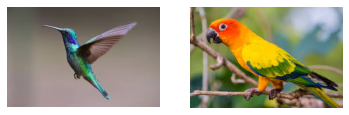

In [6]:

folder_path = "./data/birds"

images = load(folder_path)

fig, axs = plt.subplots(1,2)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i])
    ax.set_axis_off()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

The steps taken: Resize the images to size 224x224 using bilinear interpolation, convert the image to a torch tensor object which also scales the values to the range `[0,1]`, and then normalize the values using `mean = [0.485, 0.456, 0.406]` and `std = [0.229, 0.224, 0.225]`.

In [7]:
import torchvision.transforms as transforms
def preprocess(img):
  norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

  transform = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      norm
  ])
  img = transform(img).unsqueeze(0)
  return img

In [8]:
images_vgg = list(map(lambda img: preprocess(img), images))
print(images_vgg[0].shape, ',' ,type(images_vgg[0]))

torch.Size([1, 3, 224, 224]) , <class 'torch.Tensor'>


4. Feed the images (forward pass) to the model. What are the outputs? To convert from class index to label, use the supplied `./data/imagenet1000_clsidx_to_labels.txt` file

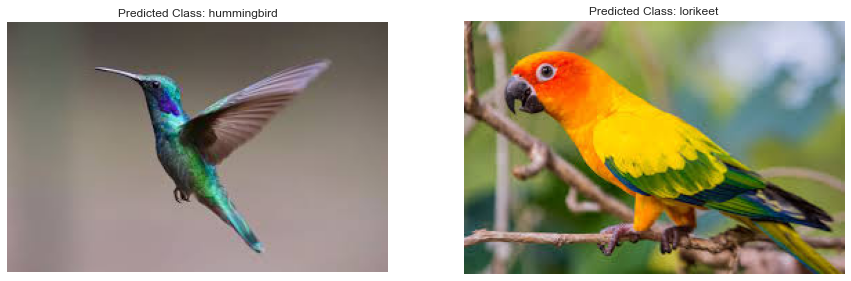

In [40]:
with open("./data/imagenet1000_clsidx_to_labels.txt", "r") as f:
    labels = np.array(f.read().splitlines())
label = []
with torch.no_grad():
    for img in images_vgg:
        output = vgg16(img)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_index = torch.argmax(probabilities).item()
        label.append(labels[predicted_index].split(':')[1][2:-2])
fig, axs = plt.subplots(1,2, figsize=(15,10))
for i, ax in enumerate(axs.ravel()):
    ax.imshow(images[i])
    ax.set_title(f'Predicted Class: {label[i]}')
    ax.set_axis_off()
plt.show()

5. Find an image of a bird/cat/dog on the internet, display it and feed it to network. What are the outputs?

Predicted Class: boxer


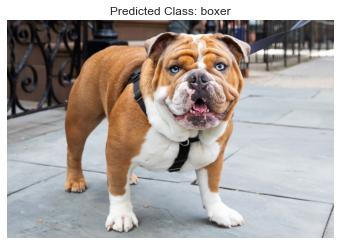

In [10]:
image_path = "./data/my_data/dog_internet.jpg"
with Image.open(image_path) as dog:
    dog_vgg = preprocess(dog)
with torch.no_grad():
    output = vgg16(dog_vgg)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_index = torch.argmax(probabilities).item()
label_dog = labels[predicted_index].split(':')[1][2:-2]
fig = plt.figure()
plt.imshow(dog)
plt.axis('off')
plt.title(f'Predicted Class: {label_dog}')
print(f'Predicted Class: {label_dog}')
plt.show()

6. For the first 3 filters in the *first layer* of VGG16, plot the filters, and then plot their response (their output) for the image from section 5. Explain what do you see.
    * Consult `ee046746_appndx_visualizing_cnn_filters.ipynb` to refresh your memory.

In [11]:
# helper functions
def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

def normalize(image, device=torch.device("cpu")):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = preprocess(image).unsqueeze(0).to(device)
    return image


def predict(image, model, labels=None):
    _, index = model(image).data[0].max(0)
    if labels is not None:
        return str(index.item()), labels[str(index.item())][1]
    else:
        return str(index.item())

def deprocess(image, device=torch.device("cpu")):
    return image * torch.tensor([0.229, 0.224, 0.225]).to(device) + torch.tensor([0.485, 0.456, 0.406]).to(device)

def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image

# functions to visualize the kernels
def plot_filters_multi_channel(t,number_of_filters_to_plot):

    # get the number of kernals
    num_kernels = t.shape[0]

    # define number of columns for subplots
    num_cols = 12
    # rows = num of kernels
    num_rows = num_kernels

    # set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))

    # looping through all the kernels
    # for i in range(t.shape[0]):

    # looping through the first number_of_filters_to_plot
    for i in range(number_of_filters_to_plot):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)

        # for each kernel, we convert the tensor to numpy
        npimg = np.array(t[i].numpy(), np.float32)
        # standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

#     plt.savefig('myimage.png', dpi=100)
    plt.tight_layout()


def plot_weights(model, layer_num):
    # extracting the model features at the particular layer number
    layer = model.features[layer_num]

    # checking whether the layer is convolution layer or not
    if isinstance(layer, nn.Conv2d):
        # getting the weight tensor data
        weight_tensor = model.features[layer_num].weight.data

        if weight_tensor.shape[1] == 3:
            plot_filters_multi_channel(weight_tensor,3)
        else:
            print("Can only plot weights with three channels with single channel = False")
    else:
        print("Can only visualize layers which are convolutional")
#outputs
def layer_outputs(image, model):
    modulelist = list(model.features.modules())
    outputs = []
    names = []
    for layer in modulelist[1:]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))

    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())

    fig = plt.figure(figsize=(30, 50))

    for i in range(len(output_im)):
        a = fig.add_subplot(8, 4, i+1)
        imgplot = plt.imshow(output_im[i])
        a.set_axis_off()
        a.set_title(names[i].partition('(')[0], fontsize=30)
    plt.tight_layout()
#     plt.savefig('layer_outputs.jpg', bbox_inches='tight')

def filter_outputs(image, model, layer_to_visualize):
    modulelist = list(model.features.modules())
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    name = None
    for count, layer in enumerate(modulelist[1:]):
        image = layer(image)
        if count == layer_to_visualize:
            output = image
            name = str(layer)

    filters = []
    output = output.data.squeeze().cpu().numpy()
    for i in range(output.shape[0]):
        filters.append(output[i,:,:])

    fig = plt.figure(figsize=(25, 20))

    for i in range(3):
        ax = fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)), i+1)
        imgplot = ax.imshow(filters[i])
        ax.set_axis_off()
        ax.set_title(f'Filter {i+1} output')
    plt.tight_layout()

def plot_filters_response(image, model, num_filters=3):
    # Get the first layer
    layer = model.features[0]

    # Extract the first num_filters filters from the layer
    filters = layer.weight.data[:, :num_filters].cpu()

    # Plot the filters
    # fig = plt.figure(figsize=(10, 5))
    # for i in range(num_filters):
    #     ax = fig.add_subplot(1, num_filters, i+1)
    #     ax.imshow(filters[i].squeeze(), cmap='gray')
    #     ax.set_title(f'Filter {i+1}')
    #     ax.set_axis_off()

    # Compute the response of the filters to the image
    response = layer(image)
    response = response[:, :num_filters].detach().cpu().numpy()

    # Plot the response
    fig = plt.figure(figsize=(10, 5))
    for i in range(num_filters):
        ax = fig.add_subplot(1, num_filters, i+1)
        ax.imshow(response[0, i],cmap='gray')
        ax.set_title(f'Filter {i+1} response')
        ax.set_axis_off()

    plt.show()


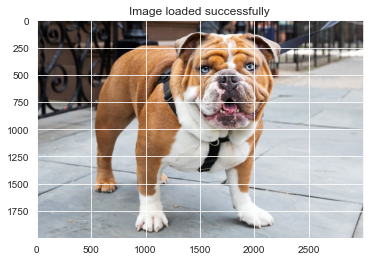

In [12]:
device = torch.device("cpu")
dog_img = load_image(r"./data/my_data/dog_internet.jpg")
prep_img = normalize(dog_img, device)

C:\Users\nirsa\anaconda3\envs\deep_learn\lib\site-packages\ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


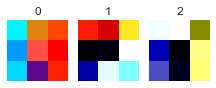

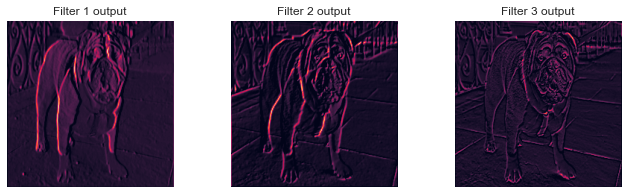

In [13]:
plot_weights(vgg16, 0)

filter_outputs(prep_img, vgg16, 1)


7. For each image in the `./data/dogs` and `./data/cats`folders, extract and save their feature vectors (create a numpy array or a torch tensor that contains the features for all samples) from a fully-connected layer (such as `FC7`) of the VGG16 model. Which layer did you pick? What is the size of the feature space?
    * You need to write a function that does the feed forward manually until the desired layer. See the example in `ee046746_appndx_visualizing_cnn_filters.ipynb`.

In [14]:
dogs_images = load('./data/dogs')
cats_images = load('./data/cats')
vgg_dogs = list(map(lambda img: preprocess(img), dogs_images))
vgg_cats = list(map(lambda img: preprocess(img), cats_images))

In [15]:
import copy
def fc7_output(image, model):
    model_copy = copy.deepcopy(model)
    list_of_layers = list(model.classifier.children())[:-1]
    new_classifier = nn.Sequential(*list_of_layers)
    model_copy.classifier = new_classifier
    output = model_copy(image)
    return torch.squeeze(output)

In [16]:
fs_cats = torch.stack([fc7_output(tensor, vgg16) for tensor in vgg_cats])
fs_dogs = torch.stack([fc7_output(tensor, vgg16) for tensor in vgg_dogs])

In [17]:
print(f'Feature space size is: {fs_cats.shape[1]}')

Feature space size is: 4096


8. Build a Support Vector Machine (SVM) classifier (hint: `sklearn.svm.LinearSVC`) to classify cats and dogs based on the features you extracted. Use the 20 images as train set, and choose 4 images (2 dogs, 2 cats) from the internet as test sets. You can choose a different classifer than SVM from the `scikit-learn` library, no need to explain how it works (but report the name of the algorithm you used). What are the results?

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
cats_labels = torch.zeros(fs_cats.shape[0], dtype=torch.long)
dogs_labels = torch.ones(fs_dogs.shape[0], dtype=torch.long)

X_train = torch.cat((fs_cats, fs_dogs)).detach().numpy()
y_train = torch.cat((cats_labels, dogs_labels)).detach().numpy()

rfc.fit(X_train, y_train)

test_features = []
test_images = load('./data/my_data/test_data')
for img in test_images:
    vgg16_img=preprocess(img)
    features = fc7_output(vgg16_img, vgg16).detach().numpy()
    test_features.append(features)

y_pred = rfc.predict(test_features)


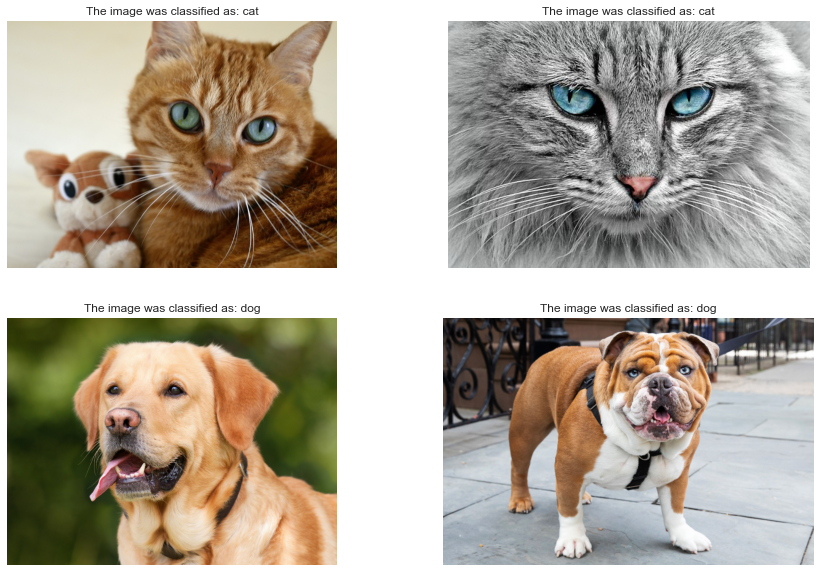

In [19]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
for i, ax in enumerate(axs.ravel()):
    label = 'dog' if y_pred[i]==1 else 'cat'
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f'The image was classified as: {label}')
plt.show()

Adversarial examples are specialised images created with the purpose of confusing a neural network, resulting in the misclassification of a given input. In this exercise you are going to create an adversarial images first by using augmentations and then by using segmentation.

9. Pick an image of an animal in its natural habitat (e.g., cow on grass fields, zebra in the safari etc. You can also use the supplied ./data/cow.jpg or ./data/sheep.jpg ).
Display the image you chose and feedforward it to the pre-trained network. What is the network's prediction? To convert from class index to label, use the supplied
./data/imagenet1000_clsidx_to_labels.txt file.


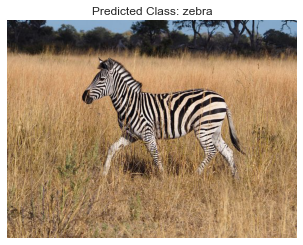

In [20]:

zebra = Image.open(r'./data/my_data/zebra.jpg')
zebra_vgg = preprocess(zebra)
with torch.no_grad():
    output = vgg16(zebra_vgg)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_index = torch.argmax(probabilities).item()

label = labels[predicted_index].split(':')[1][2:-2]

fig = plt.figure()
plt.imshow(zebra)
plt.axis('off')
plt.title(f'Predicted Class: {label}')
plt.show()

10. Apply the following 3 transformations to create 3 *new* images from the image from section 2, and display them (`openCV` has functions for all):
    * One **geometric transformation** (rotation, scaling, translation, warping...).
    * One **color transformation** (thresholding, different color space, hue, saturation, brightness, contrast...).
    * One **filter** (any filter you want).

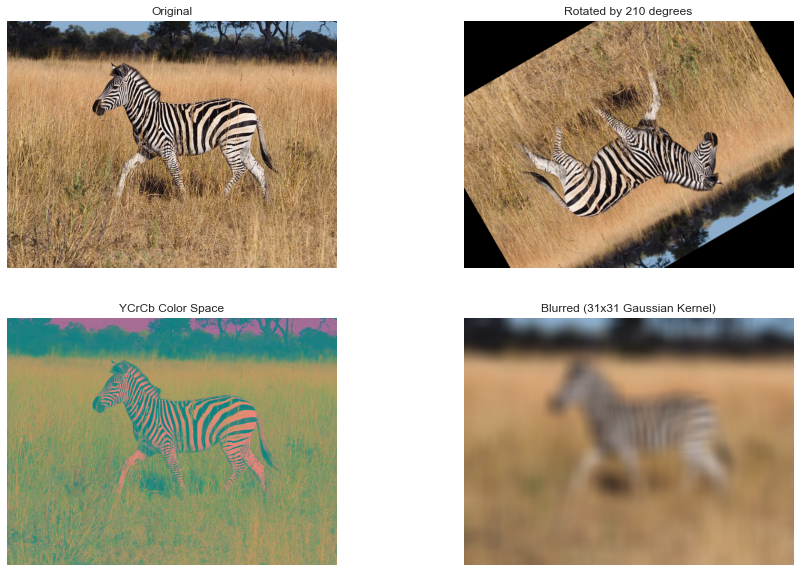

In [21]:

image = cv2.cvtColor(np.array(zebra), cv2.COLOR_RGB2BGR)

rows, cols, _ = image.shape
RotMat = cv2.getRotationMatrix2D((cols/2,rows/2), 210, 1)

rotated = cv2.cvtColor(cv2.warpAffine(image, RotMat, (cols,rows)), cv2.COLOR_BGR2RGB)
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
blurred = cv2.cvtColor(cv2.GaussianBlur(image, (31, 31), 20), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

aug_images = [image, rotated, ycrcb, blurred]
titles = ['Original', 'Rotated by 210 degrees', 'YCrCb Color Space', 'Blurred (31x31 Gaussian Kernel)']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(aug_images[i])
    ax.set_title(titles[i])
    ax.axis('off')
plt.show()



11. Feed the transformed images to network, what is the output? is it different from section 9? Discuss the reasons for that to happen.


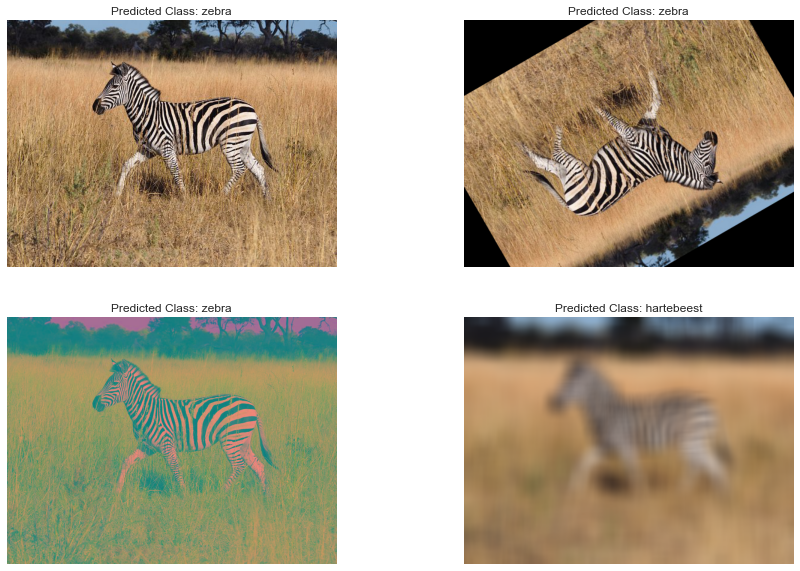

In [22]:
aug_images_pil = [Image.fromarray(img) for img in aug_images]

transformed_vgg = [preprocess(img) for img in aug_images_pil]
label=[]
for image in transformed_vgg:
    with torch.no_grad():
        output = vgg16(image)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_index = torch.argmax(probabilities).item()
        label.append(labels[predicted_index].split(':')[1][2:-2])
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(aug_images[i])
    ax.set_title(f'Predicted Class: {label[i]}')
    ax.axis('off')
plt.show()

As we can see the images were classified as zebras except for the extremely blurred image which barely have any details remaining. We'll do the same for the provided cow.jpg image:

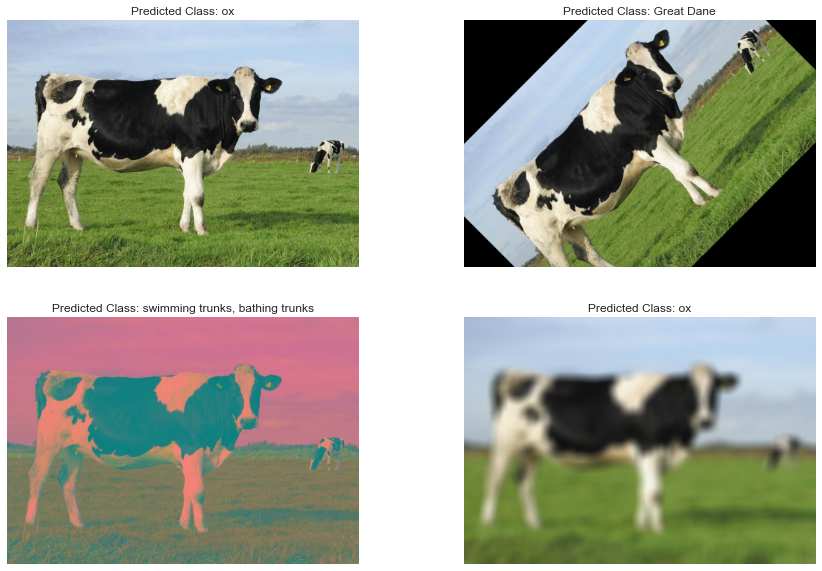

In [25]:
cow = Image.open(r'./data/cow.jpg')

image = cv2.cvtColor(np.array(cow), cv2.COLOR_RGB2BGR)

rows, cols, _ = image.shape
RotMat = cv2.getRotationMatrix2D((cols/2,rows/2), 45, 1)

rotated = cv2.cvtColor(cv2.warpAffine(image, RotMat, (cols,rows)), cv2.COLOR_BGR2RGB)
ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
blurred = cv2.cvtColor(cv2.GaussianBlur(image, (31, 31), 20), cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

aug_images = [image, rotated, ycrcb, blurred]

aug_images_pil = [Image.fromarray(img) for img in aug_images]

transformed_vgg = [preprocess(img) for img in aug_images_pil]
label=[]
for image in transformed_vgg:
    with torch.no_grad():
        output = vgg16(image)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        predicted_index = torch.argmax(probabilities).item()
        label.append(labels[predicted_index].split(':')[1][2:-2])
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axs.ravel()):
    ax.imshow(aug_images[i])
    ax.set_title(f'Predicted Class: {label[i]}')
    ax.axis('off')
plt.show()
